# Analiza podatkov

Avtorica: Neža Zupančič

Vsi podatki, ki so bili uporabljeni v projektni nalogi, so bili zbrani iz spletne strani: [Basketball reference](https://www.basketball-reference.com/)
Gre za statistične podatke igralcev lige NBA za zadnjih 25 let. Ta statistika predstavlja sezonska povprečja. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

tabela_podatkov = pd.read_csv("pridobivanje_podatkov/podatki.csv")

## Podatki

Za začetek si oglejmo tabelo podatkov.


In [3]:
tabela_podatkov

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Year
0,1,Shaquille O'Neal,27,LAL,C,79,79,40.0,12.1,21.1,...,9.4,13.6,3.8,0.5,3.0,2.8,3.2,29.7,"MVP-1,DPOY-2,AS,NBA1,DEF2",2000
1,2,Allen Iverson,24,PHI,SG,70,70,40.8,10.4,24.8,...,2.8,3.8,4.7,2.1,0.1,3.3,2.3,28.4,"MVP-7,AS,NBA2",2000
2,3,Grant Hill,27,DET,SF,74,74,37.5,9.4,19.2,...,5.3,6.6,5.2,1.4,0.6,3.2,2.6,25.8,"MVP-8,AS,NBA2",2000
3,4,Vince Carter,23,TOR,SF,82,82,38.1,9.6,20.7,...,4.0,5.8,3.9,1.3,1.1,2.2,3.2,25.7,"MVP-10,AS,NBA3",2000
4,5,Karl Malone,36,UTA,PF,82,82,35.9,9.2,18.0,...,7.4,9.5,3.7,1.0,0.9,2.8,2.8,25.5,"MVP-4,AS,NBA2",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15153,568,Danny Green,36,PHI,SG,2,0,9.0,0.0,1.0,...,1.0,1.0,0.5,0.5,0.0,0.0,0.5,0.0,NaN,2024
15154,569,Ron Harper Jr.,23,TOR,PF,1,0,4.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,NaN,2024
15155,570,Justin Jackson,28,MIN,SF,2,0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024
15156,571,Dmytro Skapintsev,25,NYK,C,2,0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024


## Povprečno število točk igralcev za vsako sezono

Zanima me ali se povprečje v zadnjih 25 letih povečuje ali ne.

In [4]:
povprečje = tabela_podatkov.groupby("Year")["PTS"].mean()
najboljše_leto = povprečje.idxmax()
najslabše_leto = povprečje.idxmin()

print(f"Najboljše leto: {najboljše_leto}")
print(f"Najslabše leto: {najslabše_leto}")

povprečje

Najboljše leto: 2023
Najslabše leto: 2004


Year
2000    7.680847
2001    7.421415
2002    7.874200
2003    7.754244
2004    7.394701
2005    7.779145
2006    7.648313
2007    8.086822
2008    7.551933
2009    8.035739
2010    8.048789
2011    7.831360
2012    7.703085
2013    7.430541
2014    7.546645
2015    7.797542
2016    7.913149
2017    8.186387
2018    7.894578
2019    8.384322
2020    8.461290
2021    8.616596
2022    7.812192
2023    8.859057
2024    8.022313
Name: PTS, dtype: float64

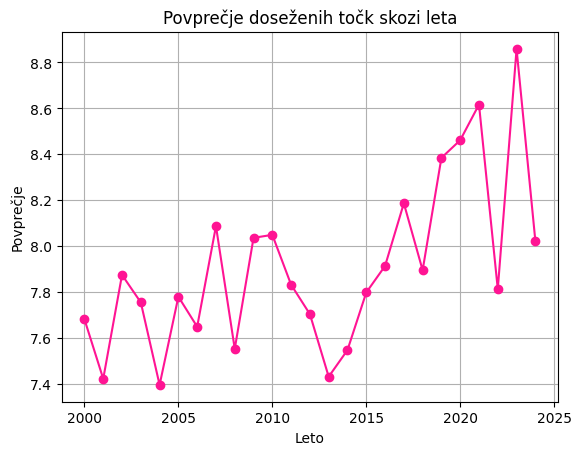

In [7]:
povprečje.plot(x="Year", y="mean", kind="line", legend=False, marker="o", color="deeppink")
plt.title("Povprečje doseženih točk skozi leta")
plt.xlabel("Leto")
plt.ylabel("Povprečje")
plt.grid()
plt.show()